<a href="https://colab.research.google.com/github/annisa456/Prediction-Stock-using-Extreme-Learning-Machine-ELM-/blob/main/ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-Processing Data

In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import pinv
from sklearn.metrics import mean_squared_error

In [ ]:
# Atur opsi tampilan
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

# Menentukan ticker saham dan periode waktu
ticker = 'SONY'
start_date = '2024-01-01'
end_date = '2025-01-01'

# Mengambil data dari Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date)

# Menampilkan data
df

/tmp/ipython-input-94-1561030521.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SONY,SONY,SONY,SONY,SONY
Date,,,,,
2024-01-02,18.598246,18.737782,18.530470,18.638114,3337500
2024-01-03,18.414854,18.498576,18.380966,18.458709,2849000
2024-01-04,18.149733,18.305216,18.083951,18.133787,4555000
2024-01-05,18.183620,18.398905,18.105879,18.129800,3612000
2024-01-08,18.418840,18.438775,18.181629,18.181629,2077000
2024-01-09,18.361034,18.414855,18.309206,18.365021,2647000
2024-01-10,19.166359,19.206227,18.951074,18.959047,5481000
2024-01-11,19.397591,19.644769,19.210213,19.594935,6116500


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,SONY,SONY,SONY,SONY,SONY
Date,,,,,
2024-12-24,21.139999,21.170000,20.990000,21.020000,979900
2024-12-26,21.180000,21.280001,21.129999,21.180000,1306500
2024-12-27,21.459999,21.530001,21.330000,21.500000,1936600
2024-12-30,21.209999,21.330000,21.049999,21.120001,1934500
2024-12-31,21.160000,21.309999,21.129999,21.230000,1186100


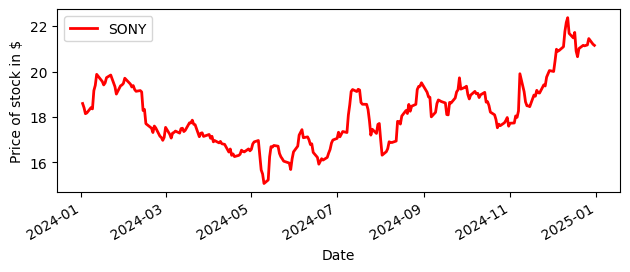

In [ ]:
#Visualising data
fig = plt.figure()

#Plot price at close
ax1 = fig.add_subplot(211, xlabel ='Number of days', ylabel='Price of stock in $')
df['Close'].plot(ax=ax1, color='r', lw=2, label = 'Adj Close saham GOTO')
ax1.legend()

plt.tight_layout()
plt.show()

In [ ]:
#create 'sliding window' of data. Lag = how far in the future we want to predict


lag = 1

def sliding_window(time_series, lag):
    L = len(time_series)
    X = np.zeros((L-lag, lag))
    Y = np.zeros((L-lag,1))

    i = 0
    while lag + i < L:
        X[i,:] = time_series[i:lag+i]
        Y[i] = time_series[lag+i]
        i+=1

    return X, Y

In [ ]:
time_series = df.Close.values
time_train = df.Close.index

In [ ]:
def min_max_normalization(data):
    """
    Apply min-max normalization to a numpy array.

    Parameters:
        data (numpy.ndarray): Input array to be normalized.

    Returns:
        numpy.ndarray: Min-max normalized data as a 1D array.
        float: Minimum of the original data.
        float: Maximum of the original data.
    """


    min_val = np.min(data)
    max_val = np.max(data)

    # Normalization
    normalized_data = (data - min_val) / (max_val - min_val)

    return normalized_data

In [ ]:
time_series_train_ = min_max_normalization(time_series)

In [ ]:
x_train, y_train = sliding_window(time_series_train_,lag)

## ELM TRAIN

In [ ]:
np.random.seed(101)
# Generating weights and biases (normally distributed)
number_hidden_neurons = 5

input_weights = np.random.normal(0, 1, size=(lag, number_hidden_neurons))
print(np.shape(input_weights))

biases = np.random.normal(0, 1, size=(number_hidden_neurons))
print(np.shape(biases))

# Activation function (Sigmoid function here)
def activation(x):
    return 1 / (1 + np.exp(-x))

(1, 5)
(5,)


In [ ]:
# fitting
def fit(x):
    G = np.dot(x, input_weights) + biases
    H = activation(G)
    return H

# ELM formula tells us that y = B H implies B = H^-1 y
output_weights = np.dot(pinv(fit(x_train)), y_train)

In [ ]:
H1 = np.dot(x_train, input_weights)

In [ ]:
G = np.dot(x_train, input_weights) + biases

In [ ]:
H = fit(x_train)

In [ ]:
# Prediction
def output_layer(x):
    out = np.dot(fit(x), output_weights)
    return out

prediction = output_layer(x_train)

In [ ]:
min_val = np.min(time_series)
max_val = np.max(time_series)
#renormalise outputs
output = prediction * (max_val - min_val) + min_val

/tmp/ipython-input-185-418996435.py:8: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(time_train[lag:], output, lw=1.5, label = 'Predicted Price at Close')


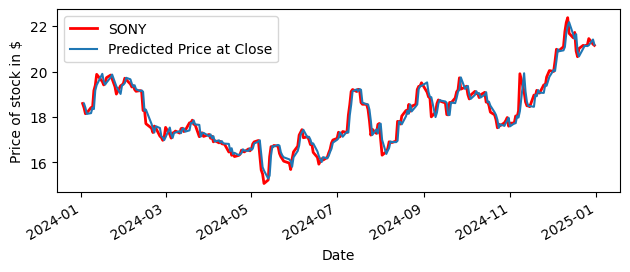

In [ ]:
fig = plt.figure()

#Plot price at close
ax1 = fig.add_subplot(211, xlabel ='Number of days', ylabel='Price of stock in $')
df['Close'].plot(ax=ax1, color='r', lw=2, label = 'Price at close')

# Plot predictions
ax1.plot(time_train[lag:], output, lw=1.5, label = 'Predicted Price at Close')
ax1.legend()

plt.tight_layout()
plt.show()

In [ ]:
weh, weh2 = sliding_window(time_series, lag)

In [ ]:
absolute_errors = np.abs(weh2 - output)

In [ ]:
sum(absolute_errors)

array([56.06774737])

In [ ]:
mse = mean_squared_error(weh2, output)
print('Test MSE: %.8f' % mse)

Test MSE: 0.09651515


In [ ]:
# RMSE
rmse = math.sqrt(mean_squared_error(weh2, output))
print('Test RMSE: %.8f' % rmse)

Test RMSE: 0.31086247


In [ ]:
def calculate_mape(actual, forecast):
    # Menghindari pembagian dengan nol
    mask = actual != 0
    actual = actual[mask]
    forecast = forecast[mask]

    # Menghitung persentase error absolut untuk setiap data
    absolute_errors = np.abs(actual - forecast)
    percentage_errors = absolute_errors / actual

    # Menghitung MAPE
    mape = np.mean(percentage_errors) * 100
    return mape

mape_result = calculate_mape(weh2, output)
print("MAPE:", mape_result)

MAPE: 1.2303278950268302


In [ ]:
min_val = np.min(time_series)
max_val = np.max(time_series)

In [ ]:
def forecasting(output_layer, y_train, max_val, min_val, num_predictions):
    # Inisialisasi list untuk menyimpan hasil prediksi
    outputs = []

    # Inisialisasi nilai awal sebagai data terakhir dari y_train
    last_prediction = y_train[-1]

    # Loop untuk membuat prediksi sebanyak num_predictions
    for i in range(num_predictions):
        # Membuat prediksi menggunakan output_layer
        prediction = output_layer(last_prediction)
        min_val = np.min(time_series)
        max_val = np.max(time_series)

        # Mengembalikan prediksi ke skala aslinya
        output = prediction * (max_val - min_val) + min_val
        print(f"Forecasting {i+1}: {output}")

        # Menyimpan hasil prediksi ke dalam list
        outputs.append(output)

        # Memperbarui last_prediction untuk prediksi berikutnya
        last_prediction = prediction

    # Mengembalikan list berisi semua hasil prediksi
    return outputs

predictions = forecasting(output_layer, y_train, max_val, min_val, 10)


Forecasting 1: [21.14583214]
Forecasting 2: [21.13274641]
Forecasting 3: [21.12064228]
Forecasting 4: [21.10943102]
Forecasting 5: [21.09903395]
Forecasting 6: [21.08938096]
Forecasting 7: [21.08040941]
Forecasting 8: [21.07206314]
Forecasting 9: [21.06429162]
Forecasting 10: [21.05704929]


In [ ]:
# Tanggal prediksi (hanya 10 hari tertentu di Januari)
forecast_dates = pd.to_datetime([
    "2025-01-02", "2025-01-03", "2025-01-06", "2025-01-07", "2025-01-08",
    "2025-01-10", "2025-01-13", "2025-01-14", "2025-01-15", "2025-01-16"
])


/tmp/ipython-input-194-881836187.py:12: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(df.index[-len(output):], output, lw=1.5, label='Predicted on Training Data')


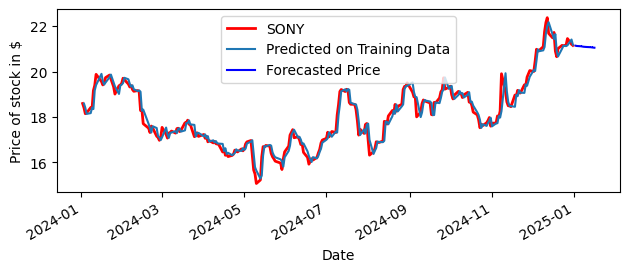

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(211, xlabel='Date', ylabel='Price of stock in $')

# Plot data aktual
df['Close'].plot(ax=ax1, color='red', lw=2, label='Actual Close Price')

# Plot prediksi terhadap data historis (output model)
ax1.plot(df.index[-len(output):], output, lw=1.5, label='Predicted on Training Data')

# Plot forecast pada tanggal-tanggal tertentu
ax1.plot(forecast_dates, predictions, lw=1.5, linestyle='-', color='blue', marker=',', label='Forecasted Price')

ax1.legend()
plt.tight_layout()
plt.show()
